In [1]:
from common import *
show_format()
#许是图像太长了？（因为不懂matplotlib.pyplot，不会调）
#修改了蒋老师的市场宽度输出格式。（程序运行速度很快）
end_date = datetime.date(2025, 1, 16)
str_ = '%s-市场宽度图(近20日数据)'%(end_date)
pretty('2',str_)
#研究  
from jqdata import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['font.size'] = 14  # 调整字体大小
#收起代码 ↑    
def getStockIndustry(p_stocks, p_industries_type, p_day):
    # type: (list, str, datetime.date) -> pd.Series
    """
    返回股票代码与所属行业汉字名称的对照表
    :param p_stocks: 股票代码列表
    :param p_industries_type: 行业分类标准，例如sw_l1
    :param p_day: 日期
    :return: pd.Series
    """
    dict_stk_2_ind = {}
    stocks_industry_dict = get_industry(p_stocks, date=p_day)
    for stock in stocks_industry_dict:
        if p_industries_type in stocks_industry_dict[stock]:
            dict_stk_2_ind[stock] = stocks_industry_dict[stock][p_industries_type]['industry_code']

    return pd.Series(dict_stk_2_ind)
    
def get_industry_width(p_end_date, p_count, p_industries_type):
    # 行业代码，行业名称
    s_industry = get_industries(name=p_industries_type, date=p_end_date)['name']
    s_industry.loc['999998'] = '全市场'
    s_industry.loc['999999'] = '合计'
    #
    trade_days = get_trade_days(end_date=p_end_date, count=p_count + 20)
    stock_list = list(get_all_securities(date=trade_days[0]).index)  # 最早的day之前20天就已经上市的股票
    s_stk_2_ind = getStockIndustry(p_stocks=stock_list, p_industries_type=p_industries_type, p_day=p_end_date)

    # 取数
    h = get_price(stock_list, end_date=p_end_date, frequency='1d', fields=['close'], count=p_count + 20, panel=False)
    h['date'] = pd.DatetimeIndex(h.time).date
    df_close = h.pivot(index='code', columns='date', values='close').dropna(axis=0)
    df_ma20 = df_close.rolling(window=20, axis=1).mean().iloc[:, -p_count:]

    df_bias = (df_close.iloc[:, -p_count:] > df_ma20)  # type: pd.DataFrame
    # 每个交易日全市场的总体状况：Close在MA20之上的比例
    s_mkt_ratio = ((100.0 * df_bias.sum()) / df_bias.count()).round()
    df_bias['industry_code'] = s_stk_2_ind

    # df_ratio: index: 行业代码, columns: 日期
    df_ratio = ((df_bias.groupby('industry_code').sum() * 100.0) / df_bias.groupby(
        'industry_code').count()).round()  # type: pd.DataFrame
    #
    s_mkt_sum = df_ratio.sum()  # 每日合计
    #
    df_ratio.loc['999998'] = s_mkt_ratio
    df_ratio.loc['999999'] = s_mkt_sum
    # 行业汉字名称
    df_ratio['name'] = s_industry
    #
    df_result = df_ratio.set_index('name').T
    #
    for col in df_result.columns:
        df_result[col] = df_result[col].astype("int32")
    #
    df_result.sort_index(ascending=False, inplace=True)
    df_result.index.name = ''
    df_result.columns.name = ''
    #
    return df_result
   
def show_industry_width(p_count, df):

    fig = plt.figure(figsize=(20, 8))#16p_count 小格子宽度
    grid = plt.GridSpec(1, 4)#1,10
    cmap = sns.diverging_palette(200, 12, as_cmap=True)#200,10
    heatmap1 = fig.add_subplot(grid[:, :-1])
    heatmap1.xaxis.set_ticks_position('top')
    sns.heatmap(df[df.columns[:-1]], vmin=0, vmax=100, annot=True, fmt="d",
                cmap=cmap,
                annot_kws={'size': 12}, cbar=False)
    str_ = '%s-市场宽度图(近20日数据)'%(end_date)
    plt.title(str_)
    heatmap2 = fig.add_subplot(grid[:, -1])
    heatmap2.xaxis.set_ticks_position('top')
    sns.heatmap(df[[df.columns[-1]]], vmin=0,
                vmax=(len(df.columns) - 2) * 100,
                annot=True, fmt="d", cmap=cmap, annot_kws={'size': 14})
    
    plt.yticks([])
    plt.show()
    plt.style.use({'figure.figsize': (16, 4)}) #下方的曲线长与高
    df[df.columns[-1]].plot()

# 行业分类
industries_type = 'sw_l1'
# "sw_l1": 申万一级行业
# "jq_l1": 聚宽一级行业
end_date = datetime.date(2025, 1, 16)
# 计算天数
count_ = 20
#
market_capacity_daily = get_industry_width(end_date, count_, industries_type)
show_industry_width(count_, market_capacity_daily)

ModuleNotFoundError: No module named 'common'

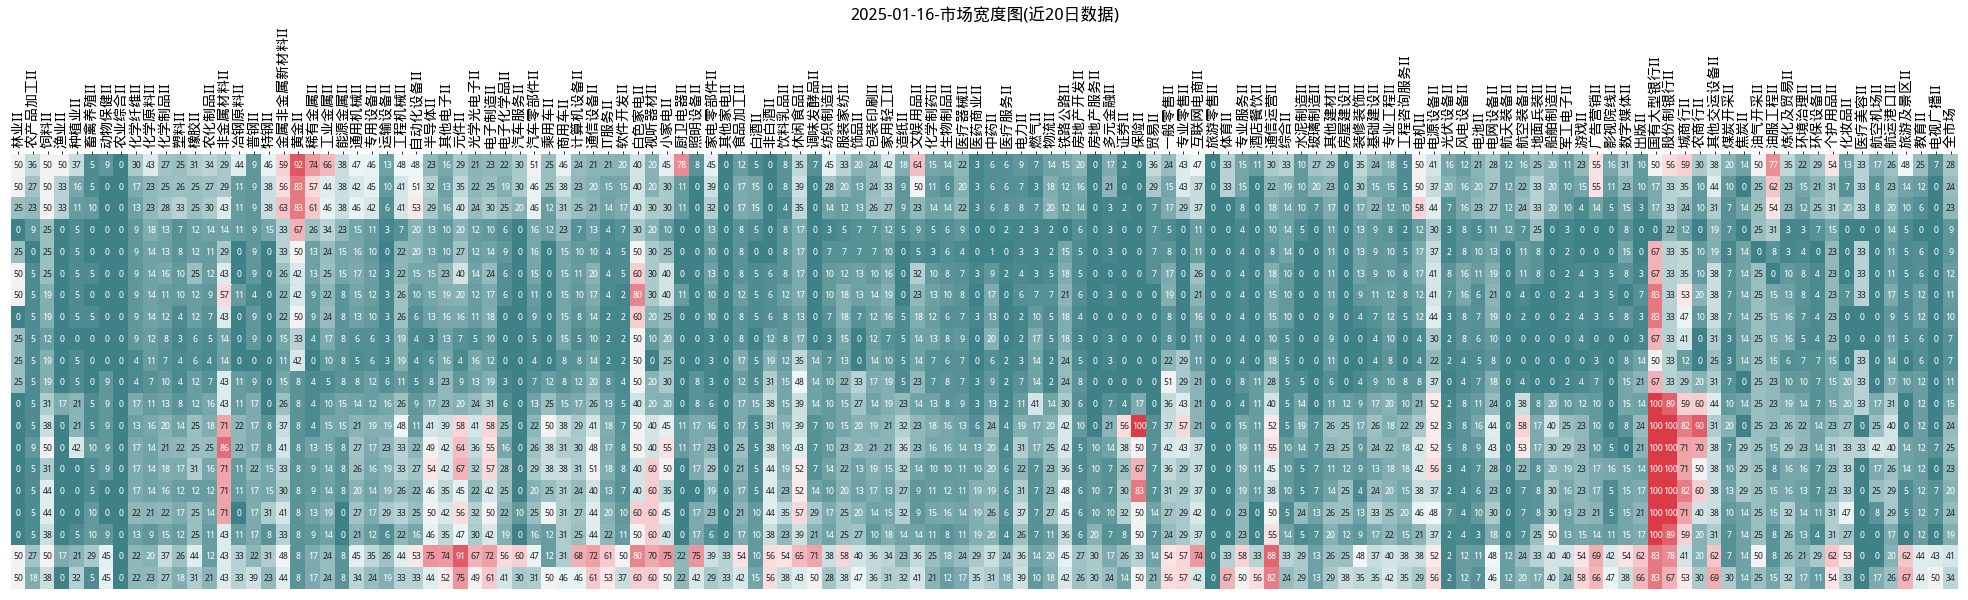

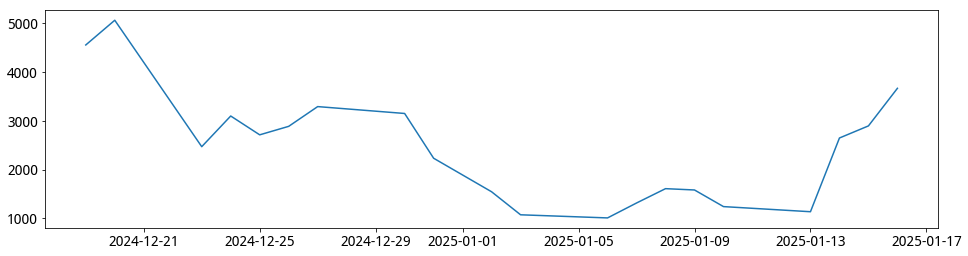

In [10]:
def show_industry_width(p_count, df):

    fig = plt.figure(figsize=(44, 8))#16p_count 小格子宽度
    grid = plt.GridSpec(1, 5)#1,10
    cmap = sns.diverging_palette(200, 10, as_cmap=True)#200,10
    heatmap1 = fig.add_subplot(grid[:, :-1])
    heatmap1.xaxis.set_ticks_position('top')
    sns.heatmap(df[df.columns[:-1]], vmin=0, vmax=100, annot=True, fmt="d",
                cmap=cmap,
                annot_kws={'size': 9}, cbar=False)
    str_ = '%s-市场宽度图(近20日数据)'%(end_date)
    plt.title(str_)
    plt.yticks([])
    plt.show()
    plt.style.use({'figure.figsize': (16, 4)}) #下方的曲线长与高
    df[df.columns[-1]].plot()
#收起代码 ↑    
##%%time
# 行业分类
industries_type = 'sw_l2'
# "sw_l1": 申万一级行业
# "jq_l1": 聚宽一级行业
end_date = datetime.date(2025, 1, 16)
# 计算天数
count_ = 20
#
market_capacity_daily = get_industry_width(end_date, count_, industries_type)
show_industry_width(count_, market_capacity_daily)

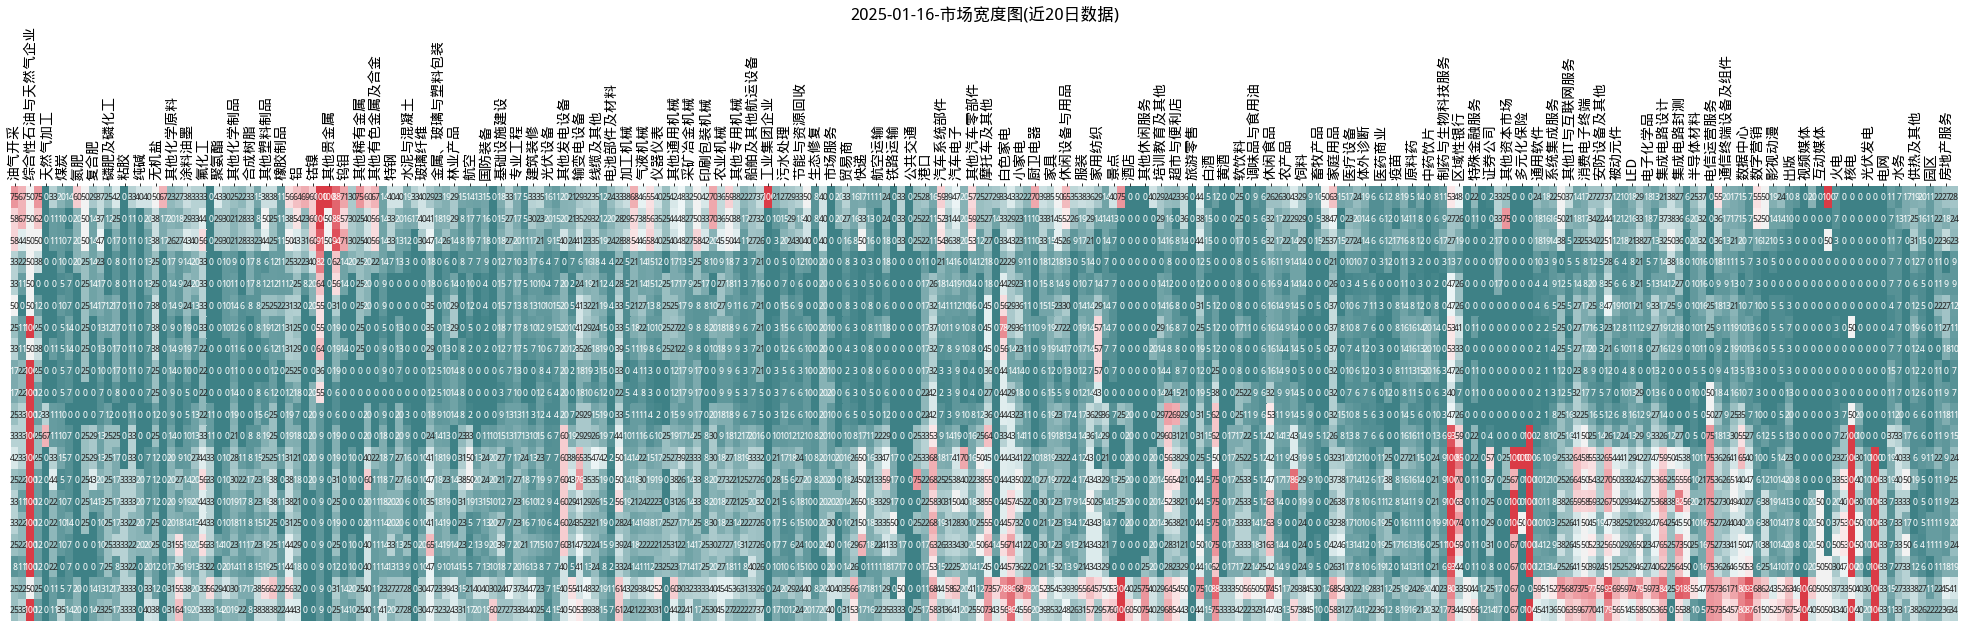

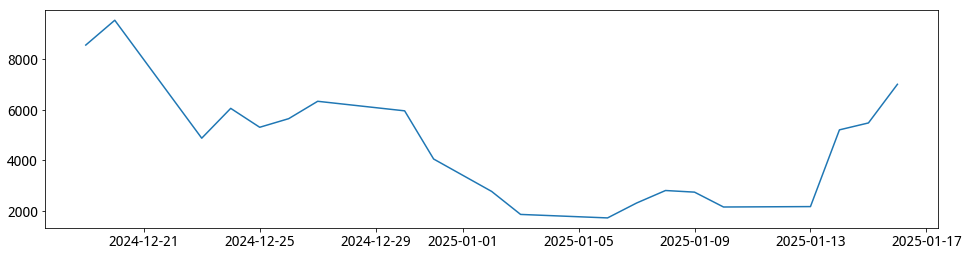

In [11]:
def show_industry_width(p_count, df):

    fig = plt.figure(figsize=(44, 8))#16p_count 小格子宽度
    grid = plt.GridSpec(1, 5)#1,10
    cmap = sns.diverging_palette(200, 10, as_cmap=True)#200,10
    heatmap1 = fig.add_subplot(grid[:, :-1])
    heatmap1.xaxis.set_ticks_position('top')
    sns.heatmap(df[df.columns[:-1]], vmin=0, vmax=100, annot=True, fmt="d",
                cmap=cmap,
                annot_kws={'size': 9}, cbar=False)
    str_ = '%s-市场宽度图(近20日数据)'%(end_date)
    plt.title(str_)
    plt.yticks([])
    plt.show()
    plt.style.use({'figure.figsize': (16, 4)}) #下方的曲线长与高
    df[df.columns[-1]].plot()
#收起代码 ↑    
##%%time
# 行业分类
industries_type = 'jq_l2'
# "sw_l1": 申万一级行业
# "jq_l1": 聚宽一级行业
end_date = datetime.date(2025, 1, 16)
# 计算天数
count_ = 20
#
market_capacity_daily = get_industry_width(end_date, count_, industries_type)
show_industry_width(count_, market_capacity_daily)

In [12]:
#自己保存下面的代码到common.py

#导入函数库

import pandas as pd
import datetime

def pretty(t,m):
    #显示方式: 0（默认值）、1（高亮）、22（非粗体）、4（下划线）、24（非下划线）
    #5（闪烁）、25（非闪烁）、7（反显）、27（非反显)
    # 前景色: 30（黑色）、31（红色）、32（绿色）、 33（黄色）、34（蓝色）、35（洋 红）、36（青色）、37（白色）
    #背景色: 40（黑色）、41（红色）、42（绿色）、 43（黄色）、44（蓝色）、45（洋 红）、46（青色）、47（白色）
    #t,选方式，m是信息变量
    if (t is "+"):
        print ("\033[1;32;7m[%s]\x1b[0m\t" %(m))
    elif (t is "-"):
        print ("\033[7;31;1m[%s]\x1b[0m\t" %(m))
    elif (t is "*"):
        print ("\033[7;34;1m[%s]\x1b[0m\t" %(m))
    elif (t is "!"):
        print ("\033[1;7;33m[%s]\x1b[0m\t" %(m))
    elif (t is "1"):
        print ("\033[7;30;1m[%s]\x1b[0m\t" %(m))
    elif (t is "2"):
        print ("\033[7;35;1m[%s]\x1b[0m\t" %(m))
    elif (t is "3"):
        print ("\033[7;36;1m[%s]\x1b[0m\t" %(m))
    elif (t is "4"):
        print ("\033[7;30m[%s]\x1b[0m\t" %(m))

def print_time(start0end1=0):
    if start0end1==0:
        dt = datetime.datetime.now()
        dt_str = 'The program running begin at:%s'%(dt)
        pretty('+',dt_str)
    elif start0end1==1:
        dt = datetime.datetime.now()
        dt_str = 'The program running end at:%s'%(dt)        
        pretty('-',dt_str)
    else:
        dt = datetime.datetime.now()
        dt_str = "I'm prepared all things OK at:%s,ready to work!"%(dt)       
        pretty('2',dt_str)        

def show_format():
    #自适应屏幕大小
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))
    import warnings
    
    warnings.filterwarnings('ignore')

    #显示所有列
    pd.set_option('display.max_columns', None)
    #显示所有行
    pd.set_option('display.max_rows', None)
    #设置value的显示长度为100，默认为50
    pd.set_option('max_colwidth',30)
    pd.set_option('display.width', 1680)		# 显示宽度
    
    print_time(start0end1=2)

